In [1]:
import pandas as pd
import pysolr
pd.set_option('display.max_columns', 500)
import matplotlib as plt
%matplotlib inline

In [2]:
solrcon = pysolr.Solr('http://localhost:8984/solr/sprod', timeout=100,search_handler='query')


In [3]:
filter_queries = ['count_options_availbale: [1 TO *]', 'styletype:P' \
#                   ,'global_attr_article_type:Casual Shoes' \
                  ,'global_attr_master_category:Footwear' \
                 ]
field_list = ['global_attr_*','styleid','product','*_article_attr','global_attr_article_type']

In [4]:
filter_queries

['count_options_availbale: [1 TO *]',
 'styletype:P',
 'global_attr_master_category:Footwear']

In [5]:
results = solrcon.search(q='*:*',fq=filter_queries,rows=100000,fl=field_list,df='full_text_myntra')

In [6]:
docs_df = pd.DataFrame(results.docs)

In [7]:
docs_df

Ankle_Height_article_attr Arch_Type_article_attr Brick_article_attr  \
0                     [regular]                    NaN                NaN   
1                     [regular]                    NaN                NaN   
2                     [regular]                    NaN                NaN   
3                     [regular]                    NaN                NaN   
4                           NaN                    NaN                NaN   
5                     [regular]               [medium]                NaN   
6                     [regular]                    NaN                NaN   
7                     [regular]               [medium]                NaN   
8                     [regular]                    NaN                NaN   
9                     [regular]                    NaN                NaN   
10                    [regular]                    NaN                NaN   
11                          NaN                    NaN                NaN   
12                    [regular]                    NaN                NaN   
13                    [regular]                    NaN                NaN   
14                    [regular]                    NaN                NaN   
15                    [regular]                    NaN                NaN   
16                    [regular]                    NaN                NaN   
17                    [regular]               [medium]                NaN   
18                    [regular]                    NaN                NaN   
19                   [high-top]                    NaN                NaN   
20                    [regular]                    NaN                NaN   
21                    [regular]                    NaN                NaN   
22                    [regular]                    NaN                NaN   
23                    [regular]                    NaN                NaN   
24                    [regular]                    NaN                NaN   
25                          NaN                    NaN                NaN   
26                    [regular]                    NaN                NaN   
27                    [regular]                    NaN                NaN   
28                    [regular]                    NaN                NaN   
29                    [regular]                    NaN                NaN   
...                         ...                    ...                ...   
56162                 [regular]                    NaN          [sandals]   
56163                 [regular]                    NaN          [sandals]   
56164                       NaN                    NaN                NaN   
56165                 [regular]                    NaN                NaN   
56166                 [regular]                    NaN                NaN   
56167                 [regular]                    NaN                NaN   
56168                 [regular]               [medium]                NaN   
56169                 [regular]               [medium]                NaN   
56170                 [regular]                    NaN                NaN   
56171                 [regular]                    NaN                NaN   
56172                 [regular]                    NaN                NaN   
56173                 [regular]                    NaN                NaN   
56174                 [regular]                    NaN                NaN   
56175                 [regular]                    NaN                NaN   
56176                 [regular]                    NaN                NaN   
56177                 [regular]                    NaN                NaN   
56178                 [mid-top]                    NaN               [na]   
56179                       NaN                    NaN                NaN   
56180                 [mid-top]                    NaN               [na]   
56181                 [regular]                    NaN               [na]   
56

In [8]:
cols = [c for c in docs_df.columns if c.lower().split('_')[-1] != 'facet']


In [9]:
docs_df = docs_df[cols]

In [19]:
docs_df['Type_article_attr'] = docs_df.Type_article_attr.apply(lambda lst : lst[0] if type(lst)==list else lst)
docs_df['Ankle_Height_article_attr'] = docs_df.Ankle_Height_article_attr.apply(lambda lst : lst[0] if type(lst)==list else lst)
docs_df['Toe_Shape_article_attr'] = docs_df.Toe_Shape_article_attr.apply(lambda lst : lst[0] if type(lst)==list else lst)
docs_df['Cushioning_article_attr'] = docs_df.Cushioning_article_attr.apply(lambda lst : lst[0] if type(lst)==list else lst)
docs_df['Insole_article_attr'] = docs_df.Insole_article_attr.apply(lambda lst : lst[0] if type(lst)==list else lst)



/Users/300032675/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/300032675/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/300032675/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

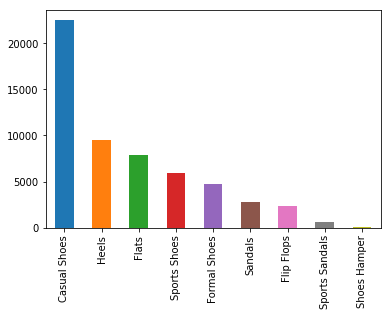

In [20]:
docs_df.global_attr_article_type.value_counts().plot(kind='bar')

In [21]:
casual_shoes = docs_df[docs_df['global_attr_article_type']=='Casual Shoes']
casual_shoes

Ankle_Height_article_attr Arch_Type_article_attr Brick_article_attr  \
10                      regular                    NaN                NaN   
12                      regular                    NaN                NaN   
13                      regular                    NaN                NaN   
15                      regular                    NaN                NaN   
19                     high-top                    NaN                NaN   
20                      regular                    NaN                NaN   
22                      regular                    NaN                NaN   
28                      regular                    NaN                NaN   
32                      regular                    NaN                NaN   
33                      regular                    NaN               [na]   
37                     high-top                    NaN               [na]   
39                      regular                    NaN               [na]   
41                      regular                    NaN  [casual sneakers]   
44                      regular                    NaN                NaN   
45                      regular                    NaN               [na]   
47                      regular                    NaN                NaN   
48                      regular                    NaN                NaN   
49                      regular                    NaN                NaN   
50                      regular                    NaN                NaN   
52                      mid-top                    NaN                NaN   
55                      regular                    NaN                NaN   
58                      regular                    NaN                NaN   
66                      regular                    NaN                NaN   
70                      mid-top                    NaN                NaN   
77                      regular                    NaN                NaN   
80                      mid-top                    NaN                NaN   
81                      regular                    NaN                NaN   
86                      regular                    NaN                NaN   
89                      regular                    NaN                NaN   
90                      regular                    NaN                NaN   
...                         ...                    ...                ...   
56134                   regular                    NaN                NaN   
56137                   regular                    NaN                NaN   
56139                   regular                    NaN                NaN   
56140                   regular                    NaN               [na]   
56141                   regular                    NaN                NaN   
56142                   regular                    NaN                NaN   
56143                   regular                    NaN                NaN   
56144                   regular                    NaN                NaN   
56145                   regular                    NaN                NaN   
56149                   regular                    NaN                NaN   
56152                   regular                    NaN                NaN   
56153                   regular                    NaN                NaN   
56154                   regular                    NaN                NaN   
56155                   regular                    NaN                NaN   
56156                       NaN                    NaN                NaN   
56158                   regular                    NaN                NaN   
56159                  high-top                    NaN                NaN   
56160                  high-top                    NaN                NaN   
56172                   regular                    NaN                NaN   
56173                   regular                    NaN                NaN   
56

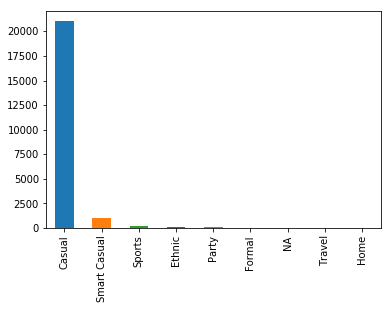

In [22]:
casual_shoes.global_attr_usage.value_counts().plot(kind='bar')

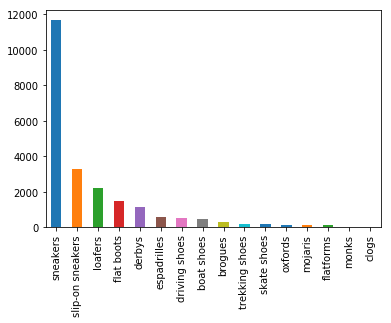

In [23]:
casual_shoes.Type_article_attr.value_counts().plot(kind = 'bar')

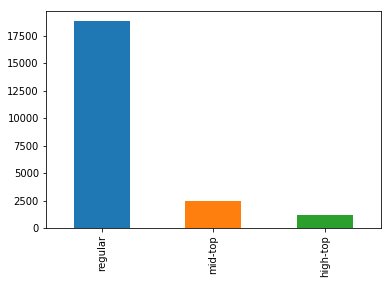

In [32]:
casual_shoes.Ankle_Height_article_attr.value_counts().plot(kind = 'bar')

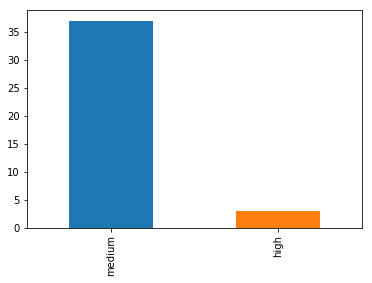

In [31]:
casual_shoes.Cushioning_article_attr.value_counts().plot(kind = 'bar')

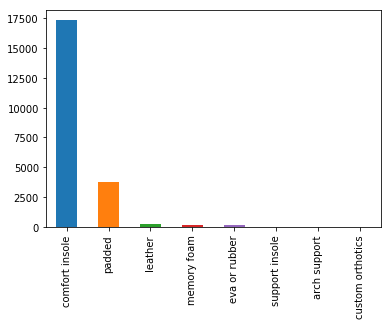

In [30]:
casual_shoes.Insole_article_attr.value_counts().plot(kind = 'bar')